In [1]:
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

import seaborn as sns

import scipy
import pylab

Matplotlib is building the font cache; this may take a moment.


In [12]:
df = pd.read_csv("../data/merged-data.csv")
names = pd.read_csv("../data/genes-to-get.csv")
df_c = pd.read_csv("../data/merged-control-data.csv")
names_c = pd.read_csv("../data/scg-controls.csv")

In [13]:
df = df.merge(names[['symbol', 'organism', 'gene_full_name']], left_on='gene', right_on='symbol', how='left')
df['name'] = df[['symbol', 'organism', 'gene_full_name']].agg('-'.join, axis=1)

df_c = df_c.merge(names_c[['symbol', 'organism', 'gene_full_name']], left_on='gene', right_on='symbol', how='left')
df_c['name'] = df_c[['symbol', 'organism', 'gene_full_name']].agg('-'.join, axis=1)

In [14]:
df.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name
0,k119_38397_2,SRR5650060,NP_417533.1,UC,8599308,900.0,81.0,5.0,76.0,900.0,8.34,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...
1,k119_60203_75,SRR6468687,AAL19701.1,nonIBD,48956407,846.0,414.0,36.0,378.0,846.0,45.05,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
2,k119_155032_2,SRR6468687,AAL19701.1,nonIBD,48956407,843.0,104.0,24.0,80.0,843.0,10.41,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
3,NaN,SRR1212289,AAL19700.1,CD,1685562,0.0,0.0,0.0,0.0,0.0,0.00,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...
4,k119_50313_4,SRR2145382,NP_417533.1,nonIBD,6515322,900.0,146.0,42.0,104.0,900.0,13.82,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...


In [15]:
df_c.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name
0,NaN,ERR011265,NP_417778.1,nonIBD,11684574,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...
1,k119_3900_3,SRR2145375,NP_417635.1,nonIBD,13713609,930.0,74.0,18.0,56.0,930.0,7.64,NP_417635.1,Escherichia,tRNA pseudouridine synthase,NP_417635.1-Escherichia-tRNA pseudouridine syn...
2,NaN,SRR6468714,NP_417762.1,UC,10753164,0.0,0.0,0.0,0.0,0.0,0.00,NP_417762.1,Escherichia,30S ribosomal subunit protein S5,NP_417762.1-Escherichia-30S ribosomal subunit ...
3,NaN,ERR011173,YP_026260.1,nonIBD,12373439,0.0,0.0,0.0,0.0,0.0,0.00,YP_026260.1,Escherichia,Porphobilinogen deaminase,YP_026260.1-Escherichia-Porphobilinogen deaminase
4,k119_67485_2,SRR6468634,NP_417780.1,UC,16121658,312.0,34.0,10.0,24.0,312.0,8.99,NP_417780.1,Escherichia,ribosomal protein S10 rpsJ,NP_417780.1-Escherichia-ribosomal protein S10 ...


In [22]:
one_scg = df_c.loc[df_c['gene'] == 'NP_417778.1']

In [23]:
pd.concat([df, one_scg], ignore_index=True)

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name
0,k119_38397_2,SRR5650060,NP_417533.1,UC,8599308,900.0,81.0,5.0,76.0,900.0,8.34,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...
1,k119_60203_75,SRR6468687,AAL19701.1,nonIBD,48956407,846.0,414.0,36.0,378.0,846.0,45.05,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
2,k119_155032_2,SRR6468687,AAL19701.1,nonIBD,48956407,843.0,104.0,24.0,80.0,843.0,10.41,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph..."
3,NaN,SRR1212289,AAL19700.1,CD,1685562,0.0,0.0,0.0,0.0,0.0,0.00,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...
4,k119_50313_4,SRR2145382,NP_417533.1,nonIBD,6515322,900.0,146.0,42.0,104.0,900.0,13.82,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12849,k119_13958_6,SRR6468509,NP_417778.1,UC,13209912,621.0,80.0,4.0,76.0,621.0,11.93,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...
12850,NaN,SRR1212821,NP_417778.1,CD,1568867,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...
12851,NaN,SRR1215917,NP_417778.1,CD,1434412,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...
12852,k119_4461_3,SRR1213913,NP_417778.1,nonIBD,2371423,606.0,49.0,1.0,48.0,606.0,7.40,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...


In [25]:
df_simple = df.copy()

df_simple['diagnosis'] = df_simple['diagnosis'].str.lower().replace({'cd': 'IBD', 'uc': 'IBD', 'nonibd': 'Control'})

df_simple['mapped_norm_by_read_count'] = df_simple['mapped']/df_simple['read_count'] * 1000000

df_simple['mapped_norm_by_contig_length'] = 0.0
df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_contig_length'] = (
    (df_simple.loc[df_simple['length'] > 0, 'mapped'] / df_simple.loc[df_simple['length'] > 0, 'length']) * 1000
)

df_simple['mapped_norm_by_read_count_and_contig_length'] = 0.0
df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_read_count_and_contig_length'] = (
    (df_simple.loc[df_simple['length'] > 0, 'mapped_norm_by_read_count'] / df_simple.loc[df_simple['length'] > 0, 'length']) * 1000
)

df_simple['log_map_norm'] = np.log2(df_simple['mapped_norm_by_read_count_and_contig_length'])

In [26]:
df_simple.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length,log_map_norm
0,k119_38397_2,SRR5650060,NP_417533.1,IBD,8599308,900.0,81.0,5.0,76.0,900.0,8.34,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,9.419363,90.000000,10.465958,3.387633
1,k119_60203_75,SRR6468687,AAL19701.1,Control,48956407,846.0,414.0,36.0,378.0,846.0,45.05,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph...",8.456503,489.361702,9.995866,3.321332
2,k119_155032_2,SRR6468687,AAL19701.1,Control,48956407,843.0,104.0,24.0,80.0,843.0,10.41,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph...",2.124339,123.368921,2.519975,1.333409
3,NaN,SRR1212289,AAL19700.1,IBD,1685562,0.0,0.0,0.0,0.0,0.0,0.00,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...,0.000000,0.000000,0.000000,-inf
4,k119_50313_4,SRR2145382,NP_417533.1,Control,6515322,900.0,146.0,42.0,104.0,900.0,13.82,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,22.408716,162.222222,24.898573,4.637991


In [35]:
df_scg = one_scg.copy()

df_scg['diagnosis'] = df_scg['diagnosis'].str.lower().replace({'cd': 'IBD', 'uc': 'IBD', 'nonibd': 'Control'})

df_scg['mapped_norm_by_read_count'] = df_scg['mapped']/df_scg['read_count'] * 1000000

df_scg['mapped_norm_by_contig_length'] = 0.0
df_scg.loc[df_scg['length'] > 0, 'mapped_norm_by_contig_length'] = (
    (df_scg.loc[df_scg['length'] > 0, 'mapped'] / df_scg.loc[df_scg['length'] > 0, 'length']) * 1000
)

df_scg['mapped_norm_by_read_count_and_contig_length'] = 0.0
df_scg.loc[df_scg['length'] > 0, 'mapped_norm_by_read_count_and_contig_length'] = (
    (df_scg.loc[df_scg['length'] > 0, 'mapped_norm_by_read_count'] / df_scg.loc[df_scg['length'] > 0, 'length']) * 1000
)

df_scg['log_map_norm'] = np.log2(df_scg['mapped_norm_by_read_count_and_contig_length'])

In [30]:
df_scg.head()

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length,log_map_norm_control
0,NaN,ERR011265,NP_417778.1,Control,11684574,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf
27,NaN,SRR1765653,NP_417778.1,IBD,2956965,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf
225,NaN,ERR011348,NP_417778.1,Control,10703567,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf
337,k119_65006_2,SRR6468651,NP_417778.1,IBD,12708046,606.0,60.0,14.0,46.0,606.0,9.36,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,4.721418,99.009901,7.791119,2.961831
392,NaN,ERR011319,NP_417778.1,Control,10113460,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf


In [36]:
df_fin = pd.concat([df_simple, df_scg], ignore_index=True)
df_fin

,contig,run,gene,diagnosis,read_count,length,mapped,unmapped,net_mapped,length_right,average_depth,symbol,organism,gene_full_name,name,mapped_norm_by_read_count,mapped_norm_by_contig_length,mapped_norm_by_read_count_and_contig_length,log_map_norm
0,k119_38397_2,SRR5650060,NP_417533.1,IBD,8599308,900.0,81.0,5.0,76.0,900.0,8.34,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,9.419363,90.000000,10.465958,3.387633
1,k119_60203_75,SRR6468687,AAL19701.1,Control,48956407,846.0,414.0,36.0,378.0,846.0,45.05,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph...",8.456503,489.361702,9.995866,3.321332
2,k119_155032_2,SRR6468687,AAL19701.1,Control,48956407,843.0,104.0,24.0,80.0,843.0,10.41,AAL19701.1,Salmonella,"fumarate hydratase, alpha subunit","AAL19701.1-Salmonella-fumarate hydratase, alph...",2.124339,123.368921,2.519975,1.333409
3,NaN,SRR1212289,AAL19700.1,IBD,1685562,0.0,0.0,0.0,0.0,0.0,0.00,AAL19700.1,Salmonella,Tartrate dehydratase beta subunit/Fumarate hyd...,AAL19700.1-Salmonella-Tartrate dehydratase bet...,0.000000,0.000000,0.000000,-inf
4,k119_50313_4,SRR2145382,NP_417533.1,Control,6515322,900.0,146.0,42.0,104.0,900.0,13.82,NP_417533.1,Escherichia,L(+)-tartrate dehydratase subunit alpha,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,22.408716,162.222222,24.898573,4.637991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12849,k119_13958_6,SRR6468509,NP_417778.1,IBD,13209912,621.0,80.0,4.0,76.0,621.0,11.93,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,6.056059,128.824477,9.752107,3.285714
12850,NaN,SRR1212821,NP_417778.1,IBD,1568867,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf
12851,NaN,SRR1215917,NP_417778.1,IBD,1434412,0.0,0.0,0.0,0.0,0.0,0.00,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,0.000000,0.000000,0.000000,-inf
12852,k119_4461_3,SRR1213913,NP_417778.1,Control,2371423,606.0,49.0,1.0,48.0,606.0,7.40,NP_417778.1,Escherichia,50S ribosomal subunit protein L4,NP_417778.1-Escherichia-50S ribosomal subunit ...,20.662699,80.858086,34.096863,5.091567


In [39]:
long_table = (
    df_fin
    .groupby(['run', 'name', 'diagnosis'])['log_map_norm']
    .sum()
    .reset_index()
)
long_table

,run,name,diagnosis,log_map_norm
0,ERR011087,AAA60327.1-Pseudomonas-tartrate dehydrogenase,Control,-inf
1,ERR011087,AAL19700.1-Salmonella-Tartrate dehydratase bet...,Control,-inf
2,ERR011087,"AAL19701.1-Salmonella-fumarate hydratase, alph...",Control,-inf
3,ERR011087,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,-inf
4,ERR011087,NP_417534.1-Escherichia-L(+)-tartrate dehydrat...,Control,-inf
...,...,...,...,...
10586,SRR6468718,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,-inf
10587,SRR6468718,NP_459741.1-Salmonella-Tartrate dehydratase be...,IBD,3.455238
10588,SRR6468718,"NP_459742.1-Salmonella-fumarate hydratase, alp...",IBD,5.961762
10589,SRR6468718,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,IBD,5.012216


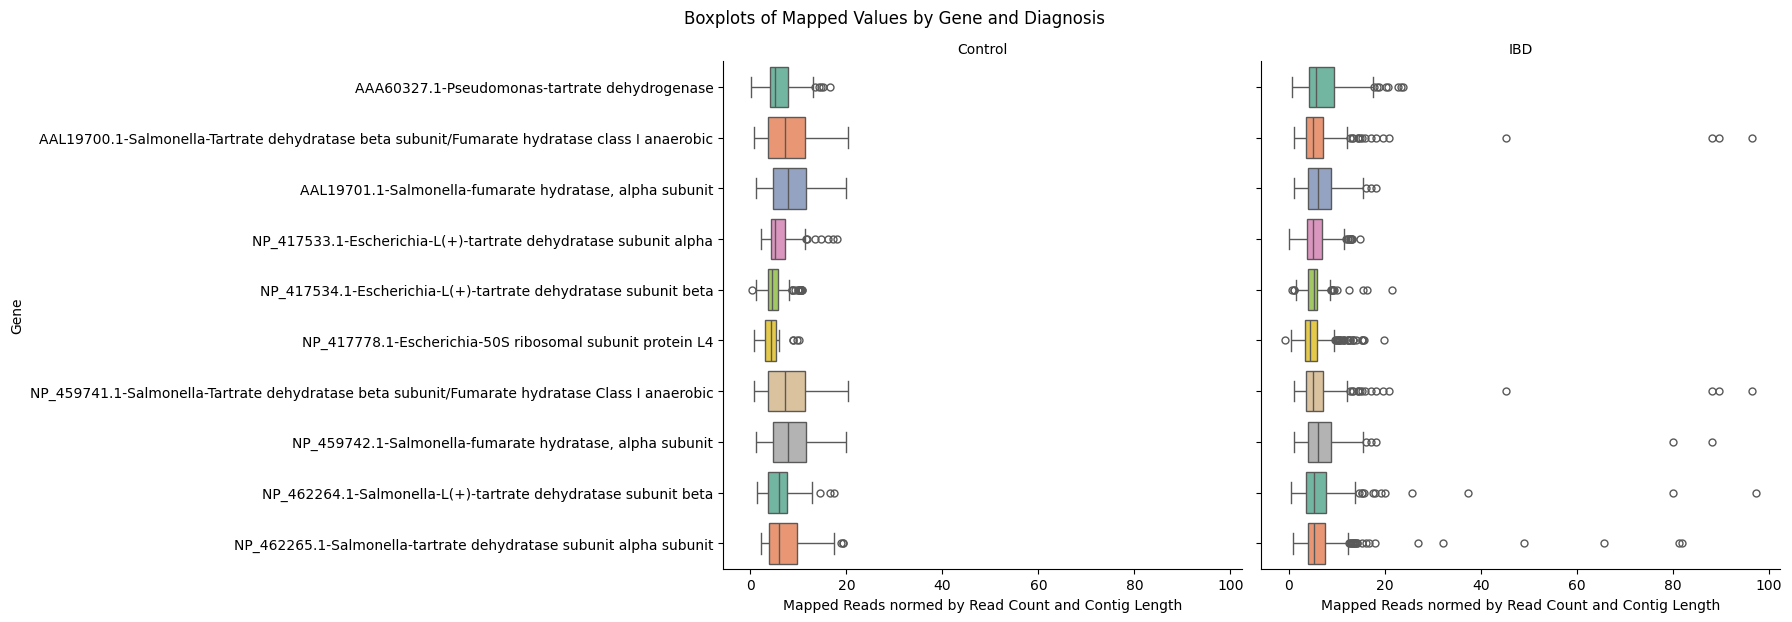

In [41]:
# While the distribution seems to show an increase in genes 
p = sns.catplot(
    data=long_table,
    x="log_map_norm",
    y="name",
    hue="name", 
    kind="box",
    col="diagnosis",
    palette="Set2",
    height=6,
    aspect=1.5
)
p.set_titles(col_template="{col_name}")
p.set_xlabels("Mapped Reads normed by Read Count and Contig Length")
p.set_ylabels("Gene")

plt.suptitle("Boxplots of Mapped Values by Gene and Diagnosis", y=1.03)
plt.show()

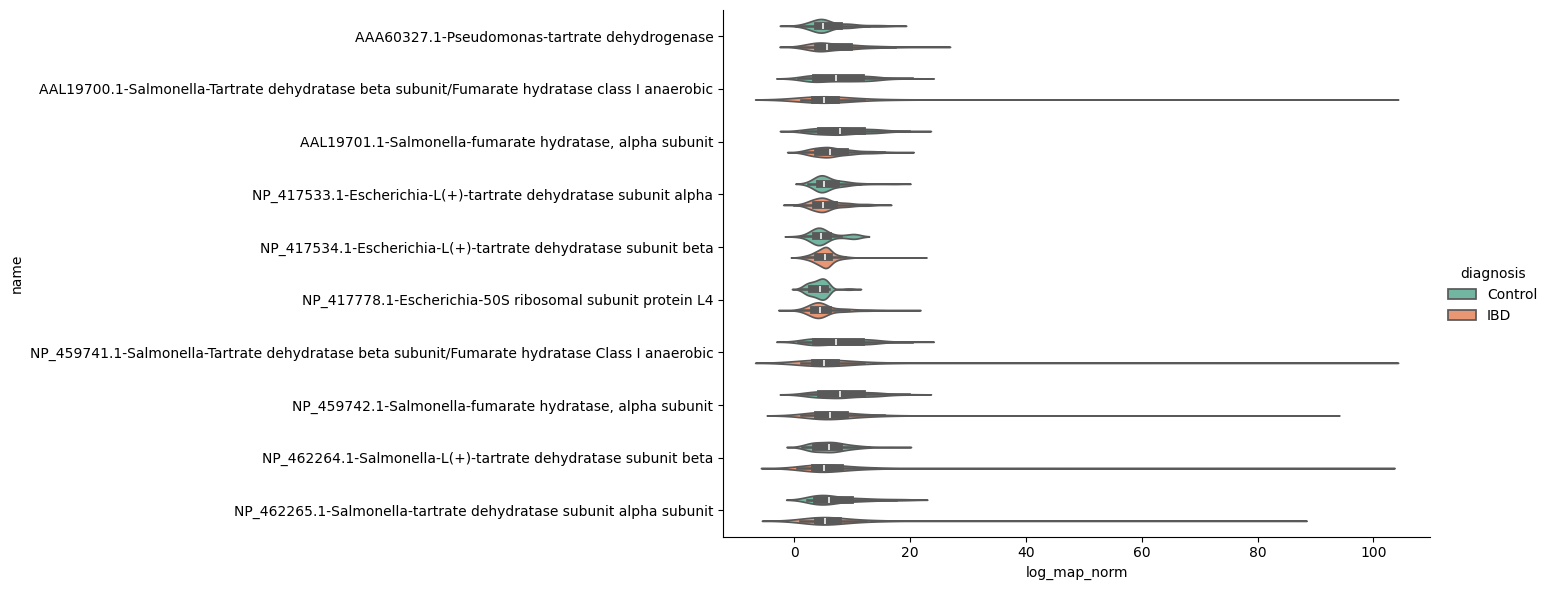

In [42]:
sns.catplot(
    data=long_table,
    x="log_map_norm",
    y="name",
    hue="diagnosis",
    kind="violin",
    palette="Set2",
    height=6,
    aspect=2.5
)

#plt.savefig('coverage_violin.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
long_table_no_inf = long_table[long_table['log_map_norm'] != -np.inf]
mean_depth_no_inf = long_table_no_zeros.groupby(['name', 'diagnosis'])['log_map_norm'].mean().reset_index(name='mean_depth')
print(mean_depth_no_zeros)

                                                 name diagnosis  mean_depth
0       AAA60327.1-Pseudomonas-tartrate dehydrogenase   Control    5.971397
1       AAA60327.1-Pseudomonas-tartrate dehydrogenase       IBD    7.298095
2   AAL19700.1-Salmonella-Tartrate dehydratase bet...   Control    7.697112
3   AAL19700.1-Salmonella-Tartrate dehydratase bet...       IBD    7.462183
4   AAL19701.1-Salmonella-fumarate hydratase, alph...   Control    8.273453
5   AAL19701.1-Salmonella-fumarate hydratase, alph...       IBD    6.714854
6   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...   Control    5.991360
7   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...       IBD    5.631064
8   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...   Control    5.262667
9   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...       IBD    5.212186
10  NP_417778.1-Escherichia-50S ribosomal subunit ...   Control    4.197389
11  NP_417778.1-Escherichia-50S ribosomal subunit ...       IBD    5.173408
12  NP_45974

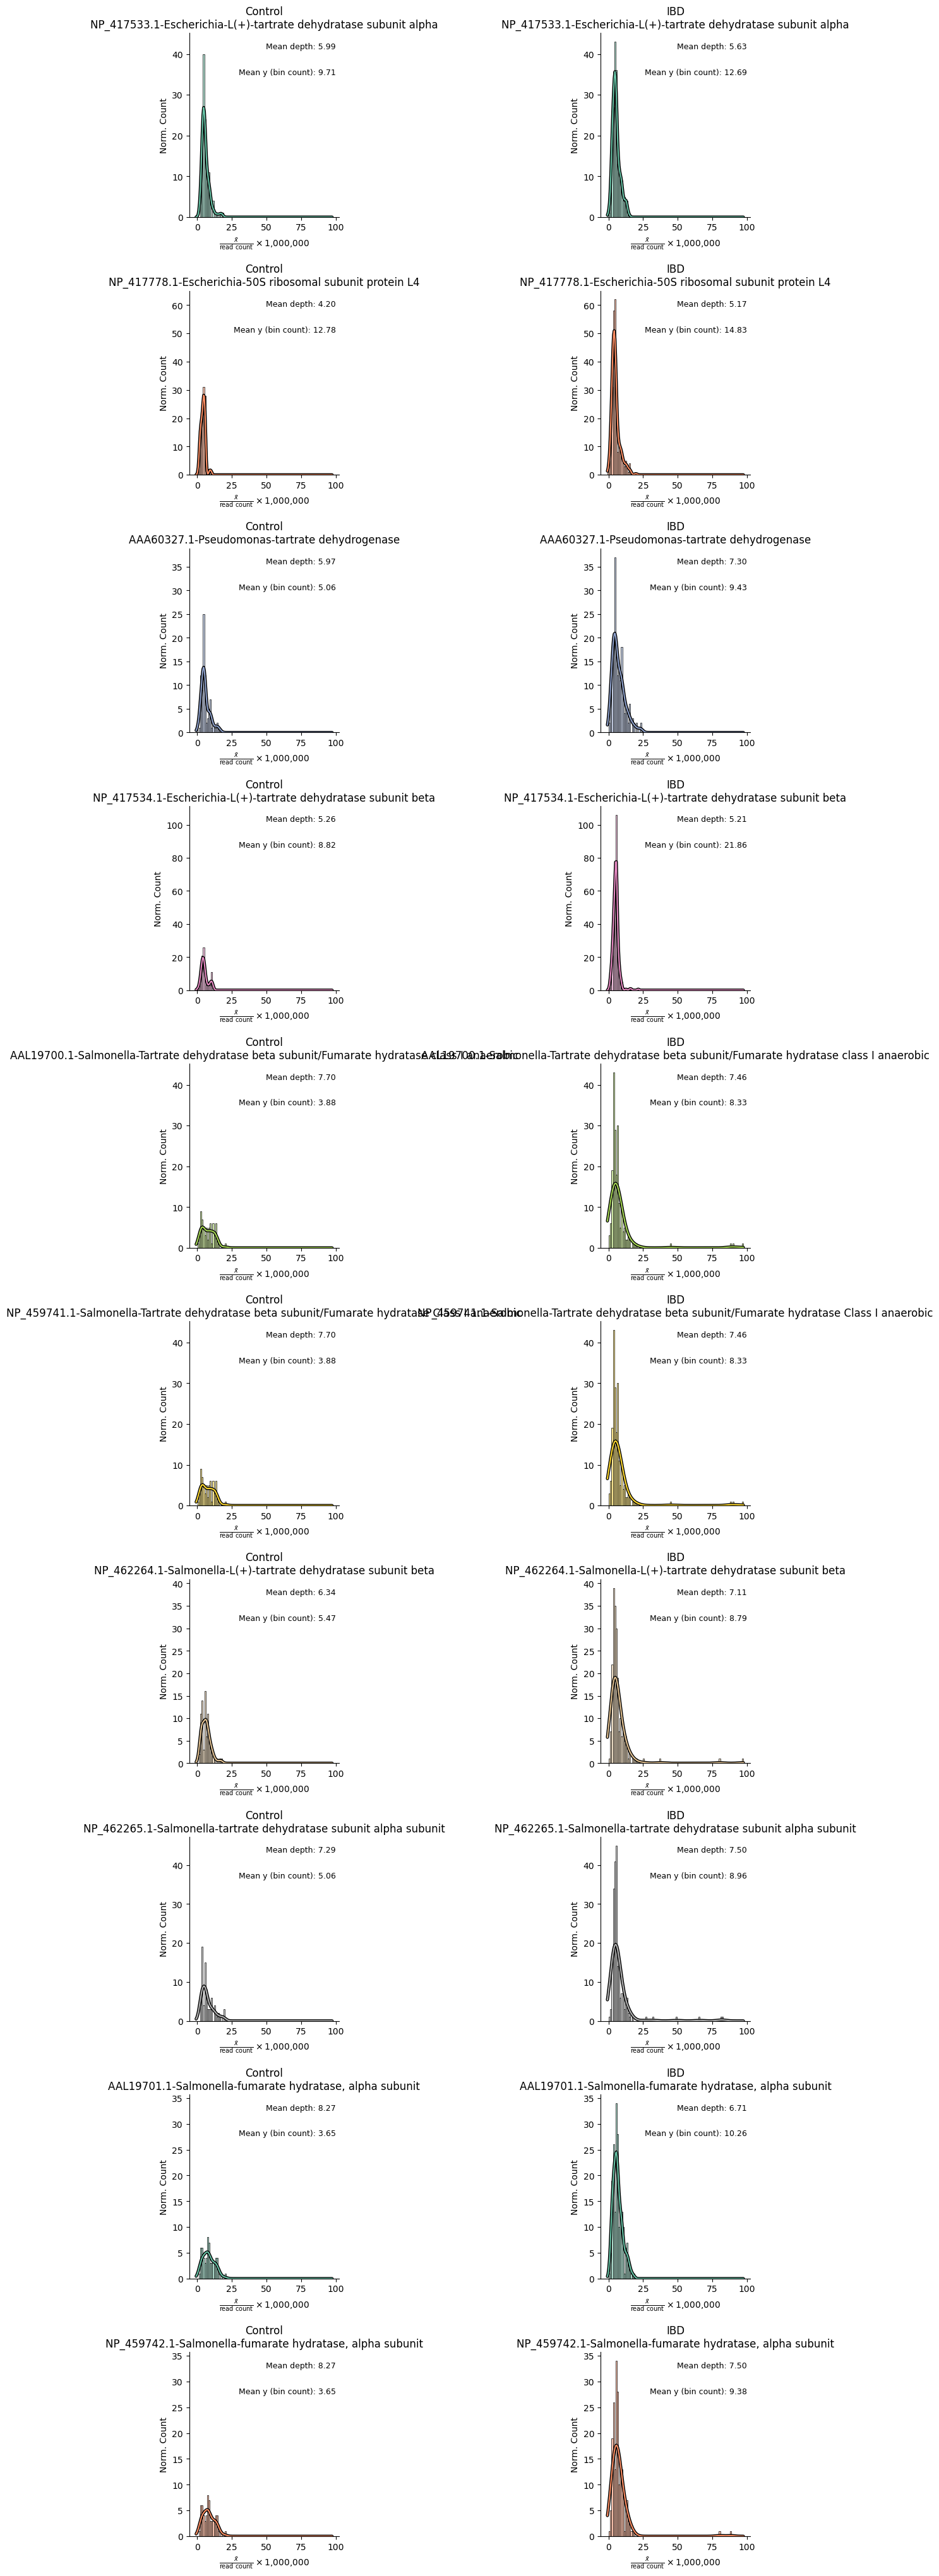

In [49]:
p = sns.displot(
    data=long_table_no_zeros,
    x="log_map_norm",
    hue="name",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='name',
    kde=True,
    #weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        name = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth_no_zeros[(mean_depth_no_zeros['name'] == name) & (mean_depth_no_zeros['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )


    ax.set_title(f'{diagnosis}\n{name}')
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p._legend.remove()
p.fig.subplots_adjust(hspace=0.4, wspace=1.75, bottom=0.20)  # add space for x axis

#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

In [52]:
long_table_simple = (
    df_simple
    .groupby(['run', 'name', 'diagnosis'])['log_map_norm']
    .sum()
    .reset_index()
)
long_table_simple_no_inf = long_table_simple[long_table_simple['log_map_norm'] != -np.inf]

long_table_simple_no_inf

,run,name,diagnosis,log_map_norm
21,ERR011089,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,6.308878
30,ERR011090,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,5.939693
39,ERR011091,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,6.170582
189,ERR011108,AAA60327.1-Pseudomonas-tartrate dehydrogenase,Control,4.132095
228,ERR011112,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,5.156924
...,...,...,...,...
9524,SRR6468718,"AAL19701.1-Salmonella-fumarate hydratase, alph...",IBD,5.961762
9527,SRR6468718,NP_459741.1-Salmonella-Tartrate dehydratase be...,IBD,3.455238
9528,SRR6468718,"NP_459742.1-Salmonella-fumarate hydratase, alp...",IBD,5.961762
9529,SRR6468718,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,IBD,5.012216


In [53]:
long_table_scg = (
    df_scg
    .groupby(['run', 'name', 'diagnosis'])['log_map_norm']
    .sum()
    .reset_index()
)
long_table_scg_no_inf = long_table_scg[long_table_scg['log_map_norm'] != -np.inf]

long_table_scg_no_inf

,run,name,diagnosis,log_map_norm
20,ERR011107,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,4.712173
21,ERR011108,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,4.676684
22,ERR011109,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,4.170108
30,ERR011117,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,5.009394
31,ERR011118,NP_417778.1-Escherichia-50S ribosomal subunit ...,Control,4.181152
...,...,...,...,...
1043,SRR6468702,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,4.303549
1044,SRR6468703,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,3.441084
1046,SRR6468705,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,3.300669
1048,SRR6468707,NP_417778.1-Escherichia-50S ribosomal subunit ...,IBD,2.664679


In [63]:
long_table_sub = long_table_simple_no_inf.merge(long_table_scg_no_inf[['run','log_map_norm']], on='run', how='left')
long_table_sub['log_map_norm_y'] = long_table_sub['log_map_norm_y'].replace(np.nan,0)

long_table_sub['log_map_norm_subed'] = long_table_sub['log_map_norm_x'] - long_table_sub['log_map_norm_y']
long_table_sub

,run,name,diagnosis,log_map_norm_x,log_map_norm_y,log_map_norm_subed
0,ERR011089,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,6.308878,0.000000,6.308878
1,ERR011090,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,5.939693,0.000000,5.939693
2,ERR011091,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,6.170582,0.000000,6.170582
3,ERR011108,AAA60327.1-Pseudomonas-tartrate dehydrogenase,Control,4.132095,4.676684,-0.544589
4,ERR011112,NP_417533.1-Escherichia-L(+)-tartrate dehydrat...,Control,5.156924,0.000000,5.156924
...,...,...,...,...,...,...
2658,SRR6468718,"AAL19701.1-Salmonella-fumarate hydratase, alph...",IBD,5.961762,0.000000,5.961762
2659,SRR6468718,NP_459741.1-Salmonella-Tartrate dehydratase be...,IBD,3.455238,0.000000,3.455238
2660,SRR6468718,"NP_459742.1-Salmonella-fumarate hydratase, alp...",IBD,5.961762,0.000000,5.961762
2661,SRR6468718,NP_462264.1-Salmonella-L(+)-tartrate dehydrata...,IBD,5.012216,0.000000,5.012216


In [65]:
mean_depth_sub = long_table_sub.groupby(['name', 'diagnosis'])['log_map_norm_subed'].mean().reset_index(name='mean_depth')
print(mean_depth_sub)

                                                 name diagnosis  mean_depth
0       AAA60327.1-Pseudomonas-tartrate dehydrogenase   Control    3.234564
1       AAA60327.1-Pseudomonas-tartrate dehydrogenase       IBD    3.540969
2   AAL19700.1-Salmonella-Tartrate dehydratase bet...   Control    6.569825
3   AAL19700.1-Salmonella-Tartrate dehydratase bet...       IBD    5.345152
4   AAL19701.1-Salmonella-fumarate hydratase, alph...   Control    7.439959
5   AAL19701.1-Salmonella-fumarate hydratase, alph...       IBD    4.277160
6   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...   Control    3.727958
7   NP_417533.1-Escherichia-L(+)-tartrate dehydrat...       IBD    1.975833
8   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...   Control    2.255315
9   NP_417534.1-Escherichia-L(+)-tartrate dehydrat...       IBD    2.213749
10  NP_459741.1-Salmonella-Tartrate dehydratase be...   Control    6.569825
11  NP_459741.1-Salmonella-Tartrate dehydratase be...       IBD    5.345152
12  NP_45974

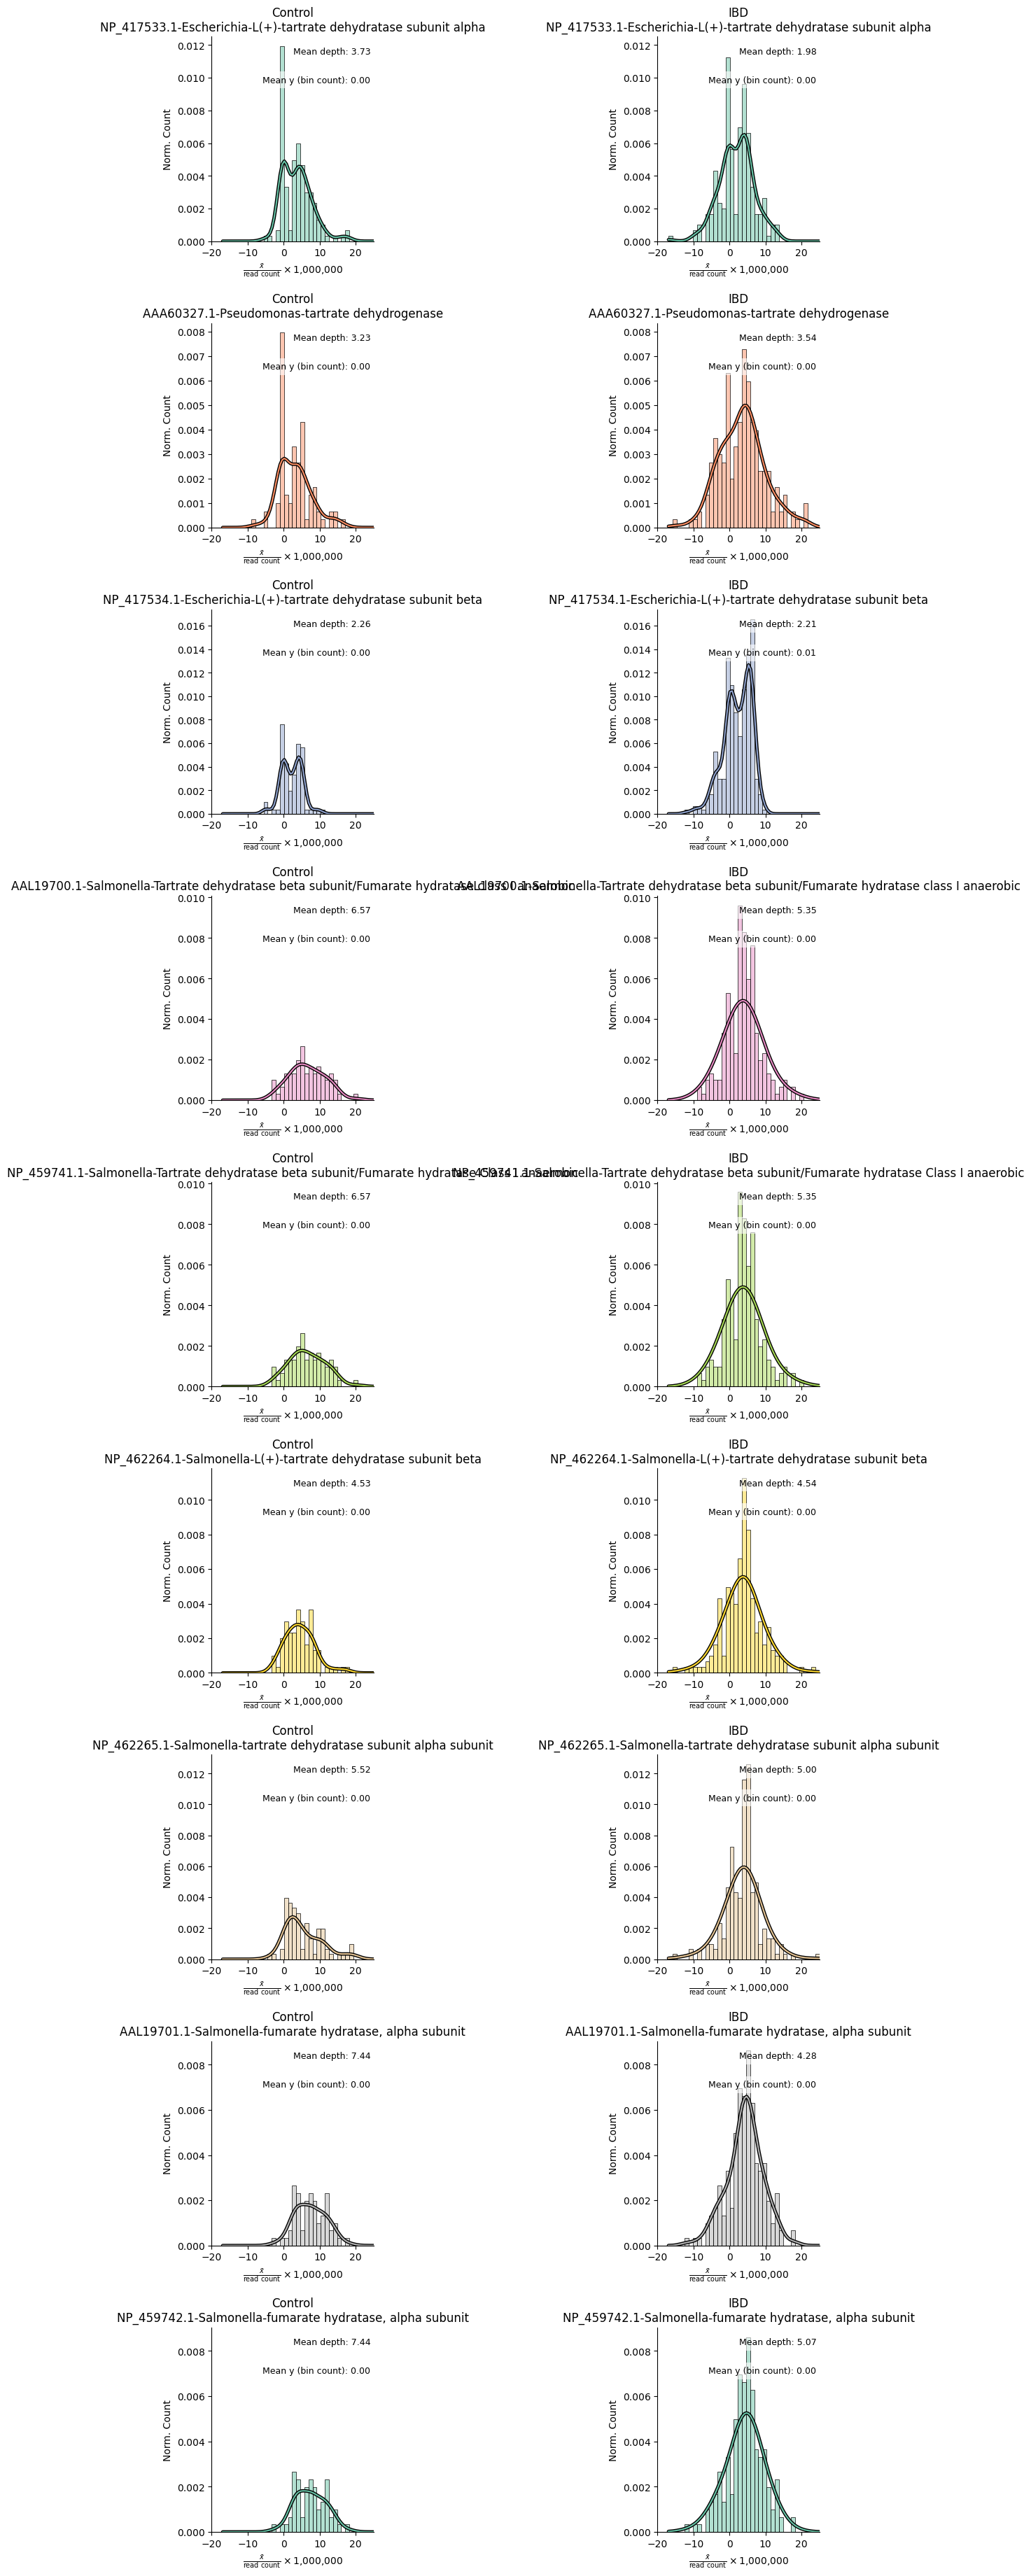

In [70]:
p = sns.displot(
    data=long_table_sub,
    x="log_map_norm_subed",
    hue="name",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='name',
    kde=True,
    stat='density',
    #weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")
        ax.set_xlim(-20,25)

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

    # Get the bar heights (i.e., counts in each bin)
    bin_counts = [patch.get_height() for patch in ax.patches if patch.get_height() > 0]
    
    # Compute mean of the bin heights (mean y-value)
    mean_con = sum(bin_counts) / len(bin_counts) if bin_counts else 0

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        name = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = mean_depth_sub[(mean_depth_sub['name'] == name) & (mean_depth_sub['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_depth'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.81,  # Lower position to stack nicely
            f"Mean y (bin count): {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )


    ax.set_title(f'{diagnosis}\n{name}')
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p._legend.remove()
p.fig.subplots_adjust(hspace=0.4, wspace=1.75, bottom=0.20)  # add space for x axis

#plt.savefig('norm_coverage_count_distribution.png', dpi=200, bbox_inches='tight')
plt.show()